# Homework 5: This or Physics Hack Day

Physics 177, Spring 2017 (Prof. Tanedo)  
Revised: Monday, May 15th  
Due: Tuesday, May 16    

Ugne Dargyte 

**Important**: This homework is optional **if** you participate in Physics Hack Day:  
http://theory.ucr.edu/PhysicsHackDay/

If you do so, please delete all of the cells below and replace it with a link to the Physics Hack Day GitHub repository to which you contributed. 


## Problem 1: Double Pendulum

In this problem, you will extend the simple pendulum in <a href="https://github.com/Physics177-2017/Homework04">Homework 4</a> to a <a href="https://en.wikipedia.org/wiki/Double_pendulum">double pendulum</a>.

<img src="hw5pendulum.png">  
Image from <a href="https://commons.wikimedia.org/wiki/File:Double-Pendulum.svg">Wikimedia Commons</a>

Assume no forces other than gravity. Do not assume the small angle approximation. 

Plot the trajectory of the double pendulum for a few different initial conditions. Your goal is to reproduce the cool-looking trajectories in the  <a href="https://en.wikipedia.org/wiki/Double_pendulum">Wikipedia article</a>, for example:

<img src="hw5_doublepic.jpg">

** Update (5/15) **: you may use the equations of motion from exercise 8.14 of the book. This assumes equal masses and equal length pendulum rods.

<img src="HW5_EOM.png">

** Check **: for the following parameters:

`g = 9.8`  
`dt = 0.01`  


`L1 = 1.0`  
`L2 = 1.0`  
`m1 = 1.0`  
`m2 = 1.0`  

`omega1_init = 0.0`  
`omega2_init = 0.0`

I obtained:

<img src="HW5_Prob1.png">

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from math import sin as sin
from math import cos as cos

L1 = L2 = L = 1.0

dt = 0.01
t_final = 20.0
g = 9.8

m1 = 1.0
m2 = 1.0

omega1_init = 1.0
omega2_init = 1.0
theta1_init = 2.0
theta2_init = 1.0

tpoints = np.arange(0, t_final, dt)

theta1 = theta1_init
theta2 = theta2_init
omega1 = omega1_init
omega2 = omega2_init

def i(theta1,theta2, omega1, omega2, t):
    return omega1

def g(theta1, theta2, omega1, omega2, t):
    return omega2

def f(theta1, theta2, omega1, omega2, t):
    return (-omega1**2*sin(2*theta1-2*theta2)+2*omega2**2*sin(theta1-theta2)+g/L*(sin(theta1-2*theta2)+3*sin(theta1)))/(3-cos(2*theta1-2*theta2))


def h(theta, omega, time):
    return (4*omega1**2*sin(theta1-theta2)+ omega2**2*sin(2*theta1 - 2*theta2)+2*g/l*(sin(2*theta1- theta2)- sin(theta2)))/(3-cos(2*theta1-2*theta2))

def time_and_angles():
    """
    Returns three Numpy arrays: 
    1. a list of time samples 
    2. a list of omega1
    3. a list of omega2
    No arguments (these are all assumed to be global variables)
    """
    
    theta1_points = []
    omega1_points = []
    theta2_points = []
    omega2_points = []
    
    # Initialize theta, omega

    
    for t in tpoints:
        
        # Record theta1, omega1 and theta2, omega2
        theta1_points.append(theta1)
        omega1_points.append(omega1)
        
        theta2_points.append(theta2)
        omega2_points.append(omega2)
        
        k1= dt*i(theta1_points[-1],omega1_points[-1], t)
        k2= dt*i(theta1_points[-1] + 0.5*k1, omega1_points[-1], t+ 0.5*dt) 
        theta1+=  k2  
        
        k1= dt*f(theta1_points[-1],omega1_points[-1],t)
        k2= dt*f(theta1_points[-1], omega1_points[-1] + 0.5 *k1 , t + 0.5*dt) 
        omega1 += k2
        
        k1= dt*g(theta2_points[-1],omega2_points[-1], t)
        k2= dt*g(theta2_points[-1] + 0.5*k1, omega2_points[-1], t+ 0.5*dt) 
        theta2+=  k2  
        
        k1= dt*h(theta2_points[-1],omega2_points[-1],t)
        k2= dt*h(theta2_points[-1], omega2_points[-1] + 0.5 *k1 , t + 0.5*dt) 
        omega2 += k2
        
           

    tt = np.array(tpoints)
    thetas1 = np.array(theta1_points)
    omegas1 = np.array(omega1_points)
    
    thetas2 = np.array(theta2_points)
    omegas2 = np.array(omegas2_points)
        
    return thetas1, omegas1, thetas2, omegas2, tt
    

def X1():
    x1 = L1*sin(thetas1) 
    return x1

def Y1():
    y1 = -L1 * cos(thetas1)
    return y1

def X2():
    x2 = L2*sin(thetas2) 
    return x2

def Y2():
    y2 = -L2*cos(theta2)
    return y2
   






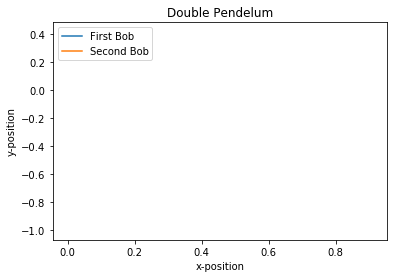

In [32]:
plt.plot(x1, y1, label = 'First Bob')
plt.plot(x2, y2, label = 'Second Bob')
plt.title("Double Pendelum")
plt.xlabel('x-position')
plt.ylabel('y-position')
plt.legend()
plt.show()


## Problem 1, extra credit:

I think the double pendulum trajectories are really neat. They're a very simple system with surprisingly complex behavior. (Maybe it's just surprising to me?) For extra credit (or for inspiration for Physics Hack Day), consider some of the following:

* Make an animation of the double pendulum trajectory. You can simultaneously animate the trajectories of both weights, see <a href="https://en.wikipedia.org/wiki/Double_pendulum#/media/File:Trajektorie_eines_Doppelpendels.gif">this  example</a>. 
* In your animation above, can you also do the "gradual fading" of the older trajectory points that is demonstrated in the example?
* Here's something really cool: can you **sonify** the trajectory? Map the *velocity* of the mass to a pitch and then play the pitch as the pendulum moves. In this way, you model the *Doppler shift* of a buzzer attached to the double pendulum. You can find an example of the implementation of the `scipy` sound library <a href="https://losc.ligo.org/s/events/GW150914/GW150914_tutorial.html">here</a>... which is itself a fantastic example of a Jupyter notebook in Nobel-prize-worthy research.
* Triple pendulum?! (If you need inspiration: https://www.youtube.com/watch?v=OQSNhk5ICTI) ... *no, it turns out that this is really hard.*

## Problem 2: Poisson Equation

The Poisson equation in two dimension is:

$$\displaystyle \partial_x^2 \phi(x,y) + \partial_y^2 \phi(x,y) = -\rho(x,y)$$

We have picked units where $\varepsilon_0 = 1$ and $\rho$ is the charge density.

This is similar to the <a href="https://github.com/Physics177-2017/Lec11-PDE/blob/master/Lecture%2011%20Preview.ipynb">Lecture 11</a> demo, except that now there are source charges. 

Numerically solve the Poisson equation following two dimensional system (Newman Example 9.2):

<img src="HW5_NewmanFig9.4.png">

This is a 2D with size 100 cm by 100 cm. There are smaller 20 cm by 20 cm squares. The one on the upper right has charge density $\rho = +1/\text{cm}^2$ and the one on the lower left has charge density $\rho = -1/\text{cm}^2$. The boundaries of the large square are set to zero potential. 

Solve for the potential, $\phi$, everywhere in the large square. Plot the potential. I leave it to you to pick a discretization (step size) that is sufficiently fast while also demonstrating the correct behavior. 

Hint: before you do anything, you should guess what the expected result should be.